# Knowledge 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

# Método pyplot

In [5]:
x = ["1T", "2T", "3T", "4T"]
y = [2000, 2200, 1100, 3540]

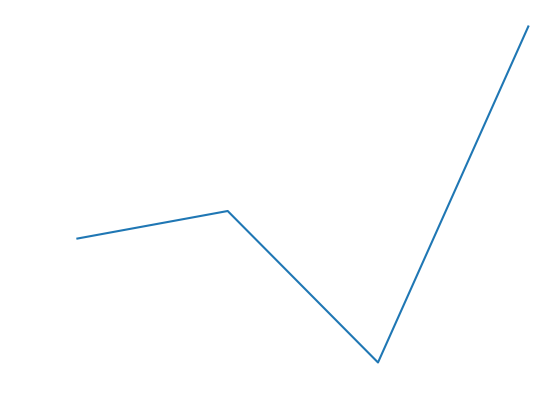

In [6]:
plt.plot(x, y)

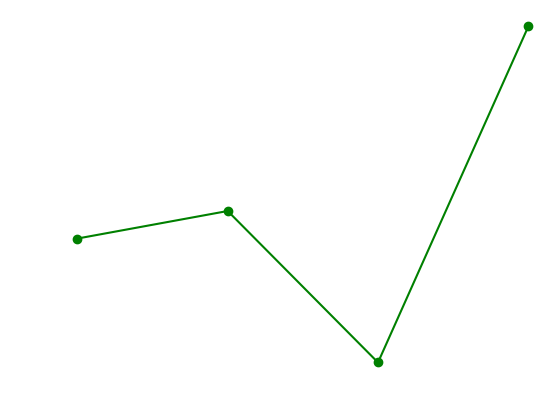

In [7]:
#vai ter uma aula sobre cada característica dessa.

plt.plot(x, y, color="green", marker='o')

#quer uma super customização? Crie gráficos como objetos. 

# Integração Pandas + Pyplot

/tmp/ipykernel_5797/4123925994.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  cotacoes = yf.download("ITUB4.SA")['Close']
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

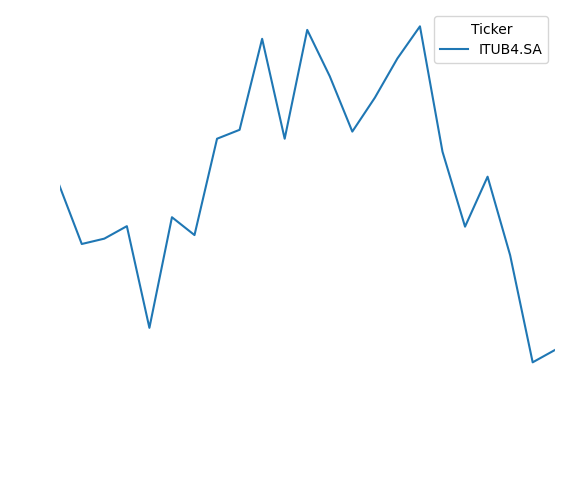

In [8]:
cotacoes = yf.download("ITUB4.SA")['Close']

cotacoes.plot()

In [9]:
df = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Close']

df = ((df.pct_change().dropna()) + 1).cumprod() - 1

df

/tmp/ipykernel_5797/3406441888.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Close']
[*********************100%***********************]  4 of 4 completed


Ticker,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,
2025-09-09,-0.017643,0.007815,-0.003016,-0.012286
2025-09-10,0.005671,0.026050,0.003903,-0.004273
2025-09-11,0.019534,0.022143,0.011710,-0.016293
2025-09-12,-0.001260,0.015305,0.011356,-0.013088
2025-09-15,0.022054,0.024096,0.020227,-0.024840
2025-09-16,0.064902,0.026701,0.023776,-0.017895
2025-09-17,0.072464,0.032888,0.025550,-0.019498
2025-09-18,0.074354,0.022794,0.023598,-0.018964
2025-09-19,0.066163,0.011397,0.027679,-0.029113


<Axes: xlabel='Date'>

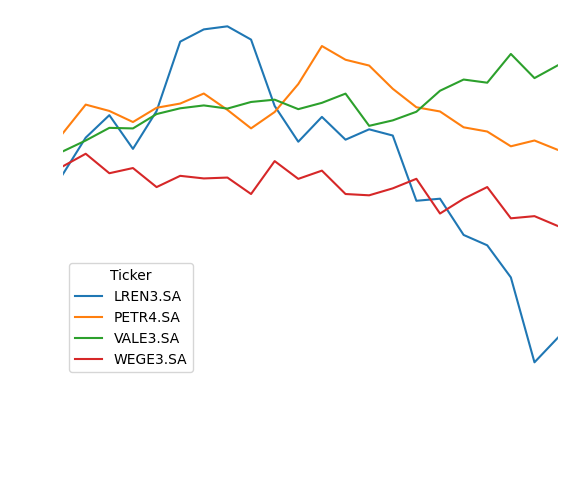

In [10]:
df.plot()

#obs: nunca faça gráficos com duas escalas. NUNCA! 

<Axes: xlabel='dias'>

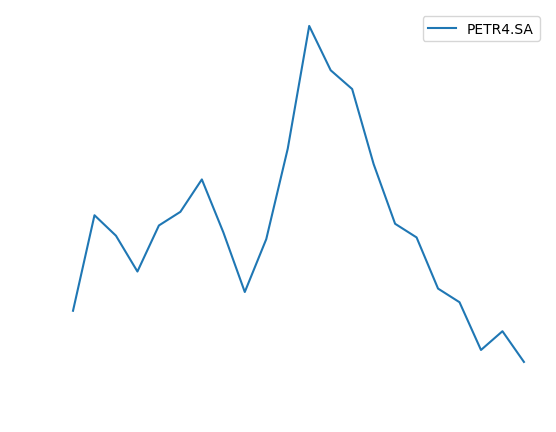

In [11]:
df_mudando_coluna = df.copy()

df_mudando_coluna['dias'] = list(range(0, len(df)))

df_mudando_coluna.plot(x = "dias", y = "PETR4.SA")

# Outros tipos de gráficos: barra, histogramas, área, dispersão, pizza...

Para criar esses outros tipos de gráficos, basta utilizar o argumento "kind" e espeficicar o gráfico.

### Gráfico de barra com a performance acumulada das ações

<Axes: xlabel='Ticker'>

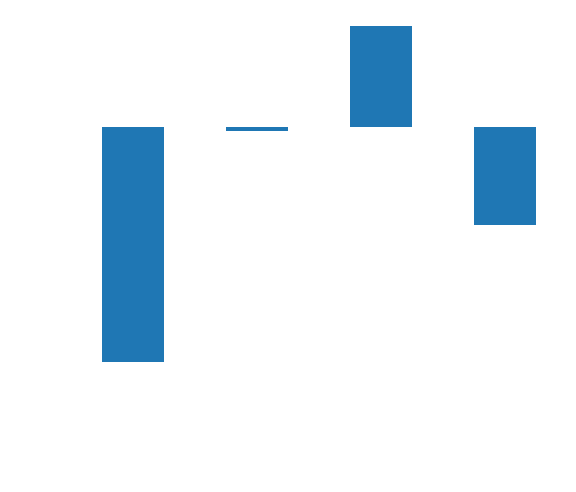

In [12]:
df.iloc[-1].plot(kind = "bar")

#brenno quero ver o eixo y em %: faça da maneira orientada a objeto. 
#Isso aqui é pra vc ver de forma rápida quando ta progrmando

### Gráfico de barra empilhado com a performance acumulada das ações ano a ano

Essa é uma ótima forma de vizualizar como os dados evoluíram ao longo do tempo. Qual % do total eles representavam antes e atualmente. É muito utilizado pra comércio internacional

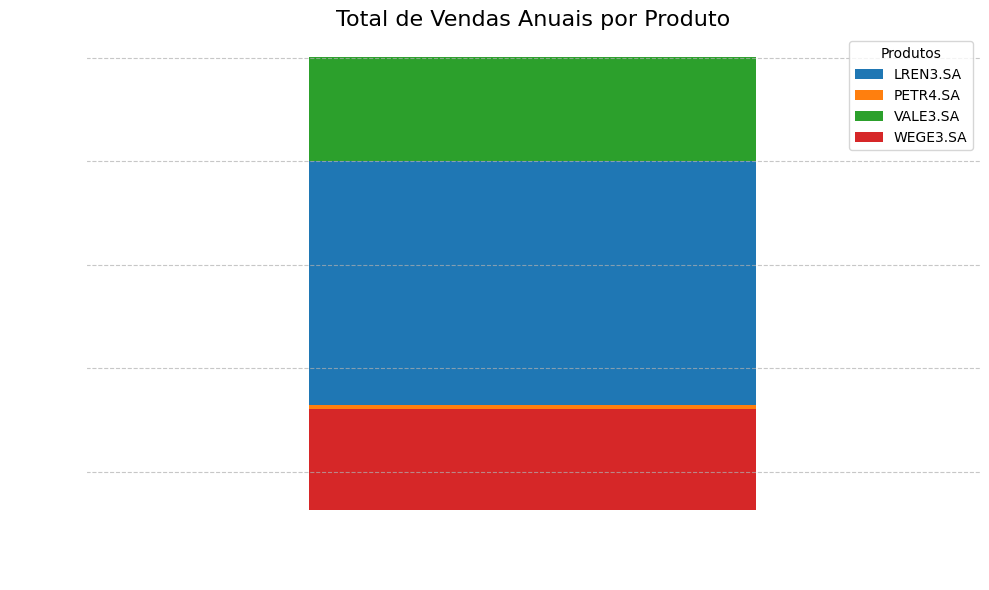

In [23]:
## 1. Criação dos Dados de Exemplo

## Primeiro, vamos criar um DataFrame (`df`) para simular dados de vendas diárias de dois produtos ao 
# longo de quatro anos. O índice do DataFrame será uma série temporal.

# Cria um range de datas para o nosso índice
datas = pd.date_range(start='2020-01-01', end='2023-12-31', freq='D')

# Cria dados aleatórios para as vendas
dados = {
    'Vendas_Produto_A': np.random.randint(50, 150, size=len(datas)),
    'Vendas_Produto_B': np.random.randint(80, 200, size=len(datas))
}

# Cria o DataFrame
df = pd.DataFrame(data=dados, index=datas)

# Exibe as 5 primeiras linhas para verificação
df.head()

# Cria o gráfico a partir do DataFrame anual
ax = df_anual.plot.bar(
    stacked=True,
    figsize=(10, 6),
    rot=0  # Mantém os rótulos do eixo X na horizontal
)

# Adiciona títulos e rótulos para deixar o gráfico mais claro
ax.set_title('Total de Vendas Anuais por Produto', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Total de Vendas', fontsize=12)

# Customiza a legenda e adiciona uma grade
ax.legend(title='Produtos')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Garante que tudo seja exibido corretamente
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [ ]:
#horizontal

df_anual.plot.barh(stacked = True)

NameError: name 'df_anual' is not defined

# Gráfico de área

Uma outra forma de visualizar isso são com gráficos de área.

In [17]:
qtd_acoes = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Volume']
preco_original = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Close']

/tmp/ipykernel_5797/532990787.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  qtd_acoes = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Volume']
[*********************100%***********************]  4 of 4 completed
/tmp/ipykernel_5797/532990787.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  preco_original = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Close']
[*********************100%***********************]  4 of 4 completed


In [18]:
volume = qtd_acoes * preco_original
volume

Ticker,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,
2025-09-08,1.472474e+08,5.578226e+08,5.467991e+08,2.263284e+08
2025-09-09,1.737110e+08,9.682367e+08,1.365434e+09,1.991228e+08
2025-09-10,2.759331e+08,1.132772e+09,7.617762e+08,2.367305e+08
2025-09-11,3.146882e+08,5.527120e+08,8.043926e+08,2.408825e+08
2025-09-12,9.573822e+07,6.023477e+08,7.013166e+08,1.808333e+08
2025-09-15,2.268283e+08,6.912207e+08,7.163062e+08,2.288635e+08
2025-09-16,3.221649e+08,6.039477e+08,9.011875e+08,2.216990e+08
2025-09-17,5.216739e+08,9.245777e+08,1.336145e+09,3.488467e+08
2025-09-18,1.509151e+08,8.073281e+08,1.021136e+09,2.819553e+08


In [19]:
volume = volume.dropna().resample("M").mean()

/tmp/ipykernel_5797/3795904149.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  volume = volume.dropna().resample("M").mean()


<Axes: xlabel='Date'>

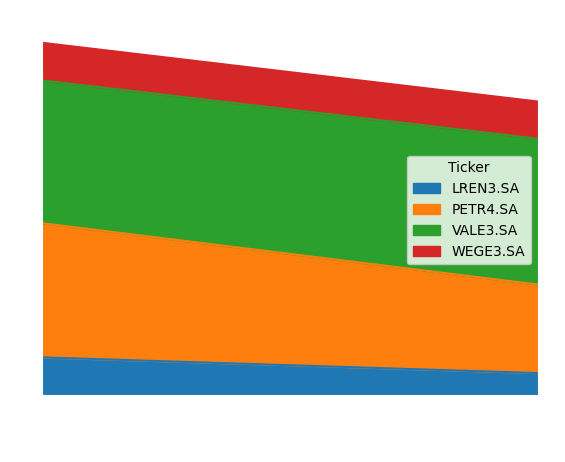

In [20]:
volume.plot.area()

### Histograma de retornos diários

In [ ]:
cotacoes = yf.download("WEGE3.SA")['Close']

retornos_diarios = cotacoes.pct_change().dropna()

retornos_diarios.plot.hist()

In [ ]:
retornos_diarios.plot.hist(bins=150)

# Boxsplot

Graças a Deus você não está na faculdade e não precisa fazer essa merda na mão.

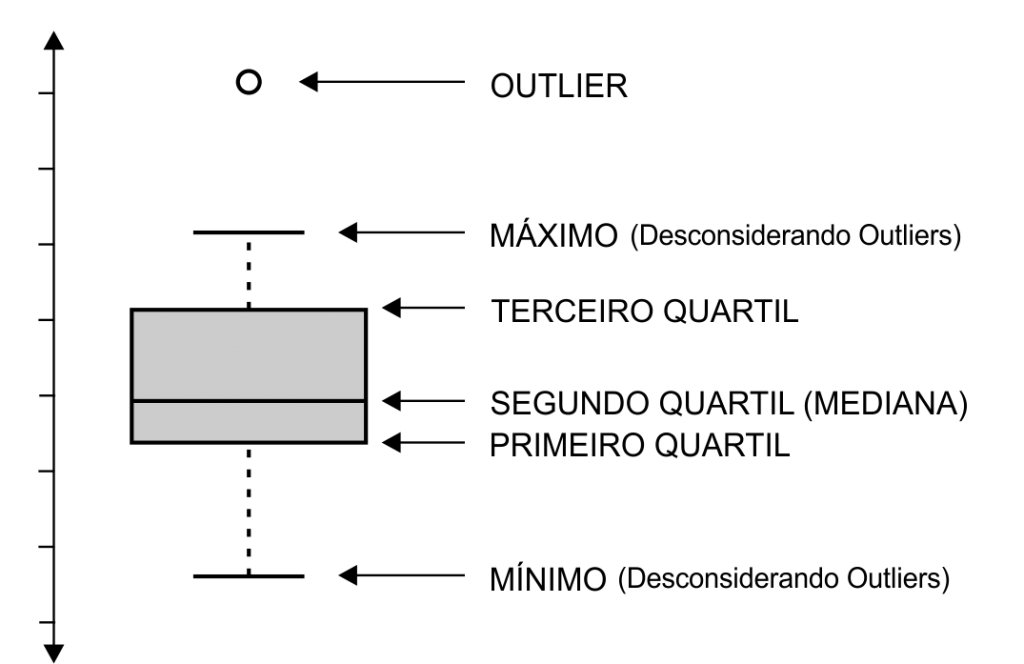

In [ ]:
cotacoes = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Close']

retornos_mensais = cotacoes.resample("M").last().pct_change().dropna()

retornos_mensais.plot.box()

# Gráfico de dispersão

Retornos Ibov x Dólar em cada ano

In [21]:
cotacoes = yf.download(["^BVSP", "USDBRL=X"])['Close']

cotacoes = cotacoes.resample("Y").last().pct_change().dropna()

cotacoes['ano'] = cotacoes.index.year
cotacoes['ano'] = cotacoes['ano'].astype("category")

cotacoes.columns = ["Ibovespa", "Dólar", "Ano"]

cotacoes

/tmp/ipykernel_5797/1844619507.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  cotacoes = yf.download(["^BVSP", "USDBRL=X"])['Close']
[*********************100%***********************]  2 of 2 completed
/tmp/ipykernel_5797/1844619507.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  cotacoes = cotacoes.resample("Y").last().pct_change().dropna()


,Ibovespa,Dólar,Ano
Date,,,


In [ ]:
cotacoes.plot.scatter(x = "Dólar", y = "Ibovespa", c = "Ano",  cmap = "viridis")

# Exercícios

* Exercício 89: Mande o usuário digitar o código de 3 empresas da bolsa. Devolva pra ele:

        - Um gráfico de linha com a trajetória das cotações das empresas.
        - Um gráfico de área com o volume de cada ação.
        - Um gráfico boxsplot com os retornos mensais de cada ação.
        - Três gráficos de dispersão entre as ações e o ibovespa pra cada ano. 

In [22]:
#gabarito 89

acao1 = str(input("Escolha a 1º ação: "))
acao2 = str(input("Escolha a 2º ação: "))
acao3 = str(input("Escolha a 3º ação: "))

lista_acoes = [acao1, acao2, acao3]

lista_acoes = [acao + ".SA" for acao in lista_acoes]

lista_acoes.append("^BVSP")

base_dados = yf.download(lista_acoes)

base_dados = base_dados.dropna()

lista_acoes.remove("^BVSP")

ibovespa = base_dados['Close']['^BVSP']

retorno_anual_ibov = ibovespa.resample("Y").last().pct_change().dropna()

cotacoes_empresas = base_dados['Close'][lista_acoes]

cotacoes_empresas_original = base_dados['Close'][lista_acoes]

qtd_acoes = base_dados['Volume'][lista_acoes]

volume = cotacoes_empresas_original * qtd_acoes

volume = volume.resample("M").last()

retornos_mensais = cotacoes_empresas.resample("M").last().pct_change().dropna()

retornos_anual = cotacoes_empresas.resample("Y").last().pct_change().dropna()

cotacoes_empresas.plot()

volume.plot.area()

retornos_mensais.plot.box()

for acao in lista_acoes:
    
    df = pd.DataFrame({acao: retornos_anual[acao],
                      'Ibovespa': retorno_anual_ibov}, index = retorno_anual_ibov.index)
    
    df['Ano'] = df.index.year
    df['Ano'] = df['Ano'].astype("category")
    
    df.plot.scatter(x = acao, y = "Ibovespa", c = "Ano",  cmap = "viridis")
                     
    
    

/tmp/ipykernel_5797/65271560.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  base_dados = yf.download(lista_acoes)
[                       0%                       ]HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: .SA"}}}
[*********************100%***********************]  2 of 2 completed

1 Failed download:
['.SA']: YFPricesMissingError('possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")')


KeyError: '^BVSP'